# Plot distance from border exponent against error

In [31]:
##Ben Pelto Nov. 2019
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker

path = '/home/pelto/Desktop/ice_thick/'
f_in = 'dfb_all_BV_A.csv' 

data = pd.read_csv(path + f_in)

# markers = ('o', 's', 'D', '^', 'v', 'p', 'D') #MUST be equal to # of glaciers
# colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462', '#b3de69'] #MUST be equal to # of glaciers

In [32]:
data[:5]

,glacier,errors,dfb,error_per_point,err_m,perc_err
0,Kokanee,131973,0.00,298.582273,17.279533,35.924186
1,Kokanee,97368,0.05,220.290715,14.842194,30.856952
2,Kokanee,87779,0.10,198.595286,14.092384,29.298096
3,Kokanee,80093,0.15,181.206094,13.461281,27.986032
4,Kokanee,74311,0.20,168.125423,12.966319,26.957004


/home/pelto/anaconda2/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


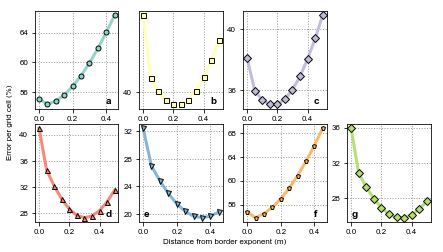

In [36]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 8}

plt.rc('font', **font)

# xmax=170
# ymax=170

# Create plot
fig, axarr = plt.subplots(2,4, sharey=False, figsize=(6,3.34))#3.34, 3.34))
# ax = fig.add_subplot(1, 1, 1) 
j, k = 0, 0
markers = ('o', 's', 'D', '^', 'v', 'p', 'D')
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462', '#b3de69']
letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
order = ['Zillmer', 'Nordic', 'Illecillewaet', 'W.Wash', 'Haig', 'Conrad', 'Kokanee']
################
count=0

for name in order:
    V=data[data.glacier==name]
#     print(data.glacier)
    V['dfb'][V['dfb'] > 0.5] = np.nan
    
    axarr[j,k].plot(V['dfb'], V['perc_err'], alpha=0.95, c=colors[count], markeredgecolor='k', 
                marker=markers[count], label=name, markersize='5', linewidth=3.)
    
#     axarr[1,0].set_ylabel('Error per grid cell (%)')#'Accum. quadratic errors (m)')
    axarr[j,k].grid(linestyle=':', linewidth=1.0, color='gray', alpha=0.8, zorder=100)
    if count == 4 or count == 6:
        axarr[j,k].text(0.05, 0.05, letter[count], transform=axarr[j,k].transAxes,  fontweight='bold', fontsize=10)
    else:
        axarr[j,k].text(0.85, 0.05, letter[count], transform=axarr[j,k].transAxes,  fontweight='bold', fontsize=10)
    axarr[0,3].axis('off')
    axarr[j,k].yaxis.set_major_locator(ticker.MultipleLocator(4))
    
#     axarr[j,k].set_yticks(np.arange(20,70,5))       #np.min(V['perc_err']), np.max(V['perc_err']), 5)
#     axarr[j,k].set_ylim(np.min(V['perc_err']), np.max(V['perc_err']))
    count+=1
    
    k += 1

    if count == 3: #changed to 2, 1 worked for 2x2 panel plot
        j += 1
        k = 0
        
# plt.legend(loc='best')

fig.subplots_adjust(bottom=0.1, top=0.98, hspace=0.15, left=0.075, right=0.99, wspace=0.25)#left=0.07, right=0.9,wspace=0.05, 
fig.text(0.01, 0.65, 'Error per grid cell (%)', rotation=90)
fig.text(0.37, 0.01, 'Distance from border exponent (m)')
# plt.tight_layout(pad=0.6)
plt.savefig(path + 'JoG/DFB_quad_errors_scatter_BV_A.pdf', dpi=300)
plt.show()